In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
N = 50; m = 3
iterations = 100

# X_base = np.random.uniform(size = (N, m))
# X_base_blind = np.ones((N, m))
c = np.zeros((iterations + 1, m))
c0 = np.array([1, 2, 3])
e = np.zeros((iterations, N, m))
c[0] = np.array([1, 1, 1])

payoff = np.zeros((iterations, N))


In [3]:
def is_converged(r, blind = False, precision = 0.05):
    
    def dilute(e):
        return np.sum(e ** (r)) + 1

    if not blind: X_base = np.random.uniform(size = (N, m))
    else: X_base = np.ones((N, m))

    for t in range(iterations):
        for i in range(N):
            e[t, i] = c[t] * X_base[i] / np.linalg.norm(c[t] * X_base[i])
            payoff[t, i] = 0
            
        for i in range(N):
            for j in range(m):
                payoff[t, i] += c0[j] * e[t, i, j] * X_base[i, j] / dilute(e[t].transpose()[j])

        for j in range(m):
            c[t + 1, j] = c0[j] / dilute(e[t].transpose()[j])

    return np.all(np.abs(e[-1] - e[-2]) < precision)

In [4]:
conv_prob = np.zeros(51)
conv_prob_blind = np.zeros(51)

In [5]:
for i in range(51):
    alpha = 0.5 + i * 0.02
    cp = 0
    cp_blind = 0
    for _ in range(100):
        if is_converged(alpha): cp += 1
        if is_converged(alpha, blind = True): cp_blind += 1
    conv_prob[i] = cp / 100
    conv_prob_blind[i] = cp_blind / 100

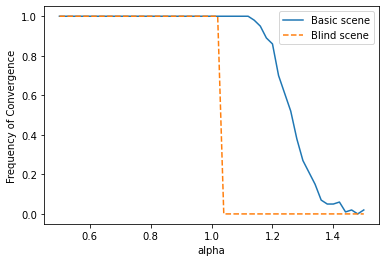

In [6]:
plt.plot(np.arange(51) * 0.02 + 0.5, conv_prob, label = "Basic scene")
plt.plot(np.arange(51) * 0.02 + 0.5, conv_prob_blind, label = "Blind scene", linestyle = "--")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("Frequency of Convergence")
plt.show()

In [7]:
alpha = 0.5 + 15 * 0.05
cp = cp_blind = 0
for _ in range(50):
    if is_converged(alpha): cp += 1
cp / 50

0.52

In [8]:
conv_prob

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98,
       0.95, 0.89, 0.86, 0.7 , 0.61, 0.52, 0.38, 0.27, 0.21, 0.15, 0.07,
       0.05, 0.05, 0.06, 0.01, 0.02, 0.  , 0.02])